Boosting is an ensemble technique in machine learning where multiple weak learners (often decision trees) are combined to create a strong learner. The goal is to reduce errors by iteratively focusing on the hardest-to-classify samples, which improves the model’s accuracy over time. Here are the most widely used boosting techniques:

### 1. **AdaBoost (Adaptive Boosting)**

**Overview**:
   - AdaBoost is one of the earliest boosting algorithms. It sequentially trains weak learners, each focusing more on samples that were misclassified by previous learners.
   - The model assigns higher weights to misclassified samples, forcing the next learner to focus on these difficult cases.

**Steps in AdaBoost**:
1. Assign equal weights to all samples.
2. Train a weak learner (usually a shallow decision tree).
3. Calculate the error of the learner and adjust sample weights: misclassified samples get increased weights.
4. Repeat the process with a new learner that focuses more on the previously misclassified samples.
5. Aggregate all weak learners to make a final strong prediction.

**Pros**:
   - Simple and efficient for binary classification tasks.
   - Reduces bias and variance.

**Cons**:
   - Sensitive to noisy data and outliers.
   - May overfit if the dataset is very noisy.

In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [3]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7111111111111111

In [4]:
ada_boost = AdaBoostClassifier(estimator=model, n_estimators=400, learning_rate=1)
ada_boost.fit(X_train, y_train)
ada_boost.score(X_test, y_test)

C:\Users\Al hamad\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


1.0

In [5]:
y_pred = ada_boost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Ada Boost Accuracy: {accuracy:.2f}')

Ada Boost Accuracy: 1.00


### 2. **Gradient Boosting**

**Overview**:
   - Gradient Boosting trains weak learners sequentially, but unlike AdaBoost, it optimizes residual errors using gradient descent.
   - Each new learner tries to correct the errors of the previous learner by minimizing the gradient of the loss function.


**Steps in Gradient Boosting**:
1. Initialize with a simple model (e.g., mean prediction for regression).
2. Compute residuals (errors).
3. Train a weak learner to predict these residuals.
4. Update predictions by adding the residual predictions, scaled by a learning rate.
5. Repeat until reaching the desired number of learners or minimal error.

**Pros**:
   - Highly accurate and often used in winning machine learning competitions.
   - Handles different types of loss functions (e.g., squared error, log loss).

**Cons**:
   - Can be slow to train.
   - Prone to overfitting if too many trees are added.

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
gb_clf = gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

1.0

In [8]:
y_pred = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Accuracy: {accuracy:.2f}')

Gradient Boosting Accuracy: 1.00


### 3. **XGBoost (Extreme Gradient Boosting)**

**Overview**:
   - XGBoost is an optimized version of gradient boosting with additional features like regularization, which improves performance and reduces overfitting.
   - It uses advanced techniques such as parallel processing, tree pruning, and handling of missing values.

**Pros**:
   - Very efficient and faster than traditional gradient boosting.
   - Provides regularization (L1 and L2) to control overfitting.
   - Commonly used in competitive machine learning.

**Cons**:
   - High memory usage for large datasets.
   - Requires careful parameter tuning for optimal results.

In [9]:
!pip install xgboost
from xgboost import XGBClassifier

Defaulting to user installation because normal site-packages is not writeable


In [10]:
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_clf.score(X_test, y_test)

1.0

In [11]:
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.2f}')

XGBoost Accuracy: 1.00


### 4. **LightGBM (Light Gradient Boosting Machine)**

**Overview**:
   - LightGBM is designed for high-speed, high-performance gradient boosting, especially for large datasets.
   - It grows trees leaf-wise instead of depth-wise, meaning it grows the tree to maximize accuracy while maintaining high efficiency.

**Pros**:
   - Faster training speed and lower memory usage.
   - Better suited for large datasets.

**Cons**:
   - Sensitive to overfitting on small datasets.
   - Requires careful tuning to achieve optimal performance.

In [12]:
!pip install lightgbm
import lightgbm as lgb

Defaulting to user installation because normal site-packages is not writeable


In [13]:
lgb_clf = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgb_clf.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 105, number of used features: 4
[LightGBM] [Info] Start training from score -1.219973
[LightGBM] [Info] Start training from score -1.043042
[LightGBM] [Info] Start training from score -1.043042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

LGBMClassifier(max_depth=3, random_state=42)

In [14]:
y_pred = lgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'LightGBM Accuracy: {accuracy:.2f}')

LightGBM Accuracy: 1.00


### 5. **CatBoost (Categorical Boosting)**

**Overview**:
   - CatBoost is specifically designed to handle categorical features efficiently without needing explicit preprocessing.
   - It uses an ordered boosting technique to prevent target leakage and can be used for both regression and classification.

**Pros**:
   - Handles categorical data directly, saving preprocessing time.
   - Robust to overfitting and good for datasets with high-cardinality categorical features.

**Cons**:
   - Can be slower compared to LightGBM for large datasets.
   - Limited compatibility with some libraries for feature importance.

In [15]:
!pip install catboost
from catboost import CatBoostClassifier

Defaulting to user installation because normal site-packages is not writeable


In [16]:
cat_clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=0)
cat_clf.fit(X_train, y_train)

In [17]:
y_pred = cat_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'CatBoost Accuracy: {accuracy:.2f}')

CatBoost Accuracy: 1.00


### Summary Table:

| Boosting Technique | Main Feature                    | Pros                                         | Cons                                |
|--------------------|---------------------------------|----------------------------------------------|-------------------------------------|
| **AdaBoost**       | Adaptive weights on errors      | Simple, reduces bias/variance                | Sensitive to noise, may overfit     |
| **Gradient Boosting** | Gradient optimization for residuals | Accurate, flexible loss functions         | Slow to train, prone to overfitting |
| **XGBoost**        | Optimized gradient boosting     | Fast, regularization, efficient              | High memory usage, tuning required  |
| **LightGBM**       | Leaf-wise tree growth           | Fast, low memory, suited for large datasets  | Sensitive to overfitting            |
| **CatBoost**       | Categorical handling            | Directly handles categorical features        | Slower, limited feature importance  |

These boosting techniques are highly effective in a wide range of applications, from binary and multiclass classification to regression problems, and they are often the preferred choice for machine learning competitions due to their accuracy and robustness.

Here’s a table comparing **XGBoost** and **Gradient Boosting**:

| Feature             | XGBoost                                            | Gradient Boosting                            |
|---------------------|----------------------------------------------------|----------------------------------------------|
| **Description**     | Advanced implementation of gradient boosting       | Ensemble technique using weak learners       |
| **Optimization**    | Regularized objective function                     | Error gradient minimization                  |
| **Efficiency**      | Highly optimized, efficient                       | Computationally intensive                    |
| **Missing Values**  | Built-in support                                   | Requires preprocessing                       |
| **Regularization**  | Built-in L1 and L2                                 | Requires external steps                      |
| **Feature Importance** | Built-in measures                              | Limited, needs external calculation          |
| **Interpretability**   | Complex, less interpretable                    | More interpretable models                    | 


Here’s a table comparing **XGBoost** and **Random Forest**:

| Feature                  | XGBoost                                            | Random Forest                                     |
|--------------------------|----------------------------------------------------|---------------------------------------------------|
| **Description**          | Improves mistakes from previous trees              | Builds trees independently                        |
| **Algorithm Type**       | Boosting                                           | Bagging                                           |
| **Handling of Weak Learners** | Corrects errors sequentially               | Combines predictions of independently built trees |
| **Regularization**       | Uses L1 and L2 regularization to prevent overfitting | Typically does not employ regularization         |
| **Performance**          | Often performs better on structured data but requires more tuning | Simpler and less prone to overfitting |


Here's a table comparing **bias** and **variance** in machine learning:

| Aspect               | Bias                                                   | Variance                                                  |
|----------------------|--------------------------------------------------------|-----------------------------------------------------------|
| **Definition**       | Error due to overly simplistic assumptions in the model | Error due to model's sensitivity to small fluctuations in the training data |
| **Effect on Model**  | Leads to underfitting; model performs poorly on training and test data | Leads to overfitting; model fits training data well but performs poorly on test data |
| **Model Complexity** | Low-complexity models typically have high bias         | High-complexity models typically have high variance        |
| **Examples**         | Linear regression, simple decision trees               | Deep neural networks, high-depth decision trees            |
| **Desired Trade-off** | Ideally, a balance between bias and variance          | Balancing these reduces both underfitting and overfitting  |
| **Impact on Predictions** | Predictions are consistently wrong in the same way | Predictions fluctuate greatly across different datasets    |


### What is a Correlation Matrix?

A **correlation matrix** is a table that shows the correlation coefficients between many variables. Each cell in the table displays the correlation between two variables. The value of the correlation coefficient ranges from `-1` to `1`:
- **1** means a perfect positive correlation (i.e., both variables increase or decrease together).
- **-1** means a perfect negative correlation (i.e., as one variable increases, the other decreases).
- **0** means no correlation (i.e., no relationship between the variables).

Correlation matrices are useful for understanding relationships between variables in a dataset and identifying which variables are correlated with each other.

### Key Points:
- **Positive Correlation**: As one variable increases, the other also increases.
- **Negative Correlation**: As one variable increases, the other decreases.
- **No Correlation**: The variables do not show any discernible relationship.

### Types of Correlation Coefficients:
1. **Pearson's Correlation Coefficient**: Measures linear relationships between variables. This is the most commonly used type of correlation.
2. **Spearman's Rank Correlation**: Measures monotonic relationships, which can be non-linear.
3. **Kendall's Tau**: Another measure of correlation for ordinal variables, focusing on the rank of the data.

By default, `pandas` uses **Pearson's correlation** when computing the correlation matrix.

### Interpreting the Correlation Matrix:
- The diagonal values (from top-left to bottom-right) will always be 1 because each variable is perfectly correlated with itself.
- If two variables have a correlation close to **1**, it indicates that they have a strong positive relationship.
- If two variables have a correlation close to **-1**, it indicates a strong negative relationship.
- Correlations close to **0** indicate no significant linear relationship between the variables.


### Applications of Correlation Matrix:
- **Feature Selection**: In machine learning, you can use a correlation matrix to identify highly correlated features. If two features are strongly correlated, one might be redundant, and you could consider removing one to avoid multicollinearity.
- **Data Exploration**: Helps you understand relationships between variables early in the data analysis process.
- **Identifying Outliers**: If there are unexpected correlations (e.g., negative correlations where you'd expect positive), it might indicate the presence of outliers or data issues.

Let me know if you need further details or help with any specific part!

In [30]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [40]:
datas = pd.DataFrame(data.data, columns=data.feature_names)

In [45]:
datas['target'] = data.target
datas.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
data_cor = datas.corr()
data_cor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

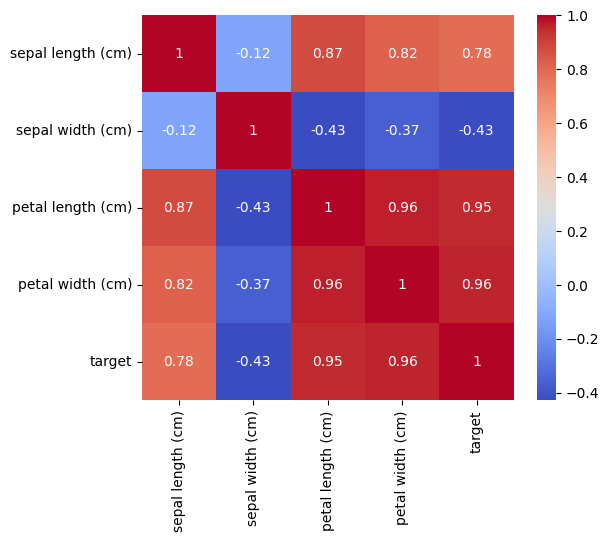

In [51]:
data_cor = datas.corr()
plt.figure(figsize=(6, 5))
sn.heatmap(data_cor, annot=True, cmap='coolwarm')

In [19]:
df = pd.read_csv('bike sharing dataset.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [27]:
# Convert datetime column to integer by converting it to int64 first (using seconds since the epoch)
df['dteday'] = pd.to_datetime(df['dteday'])
df['dteday'] = df['dteday'].astype('int64') // 10**9  # Convert to seconds since epoch

In [28]:
corr = df.corr()
corr

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
dteday,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426


<Axes: >

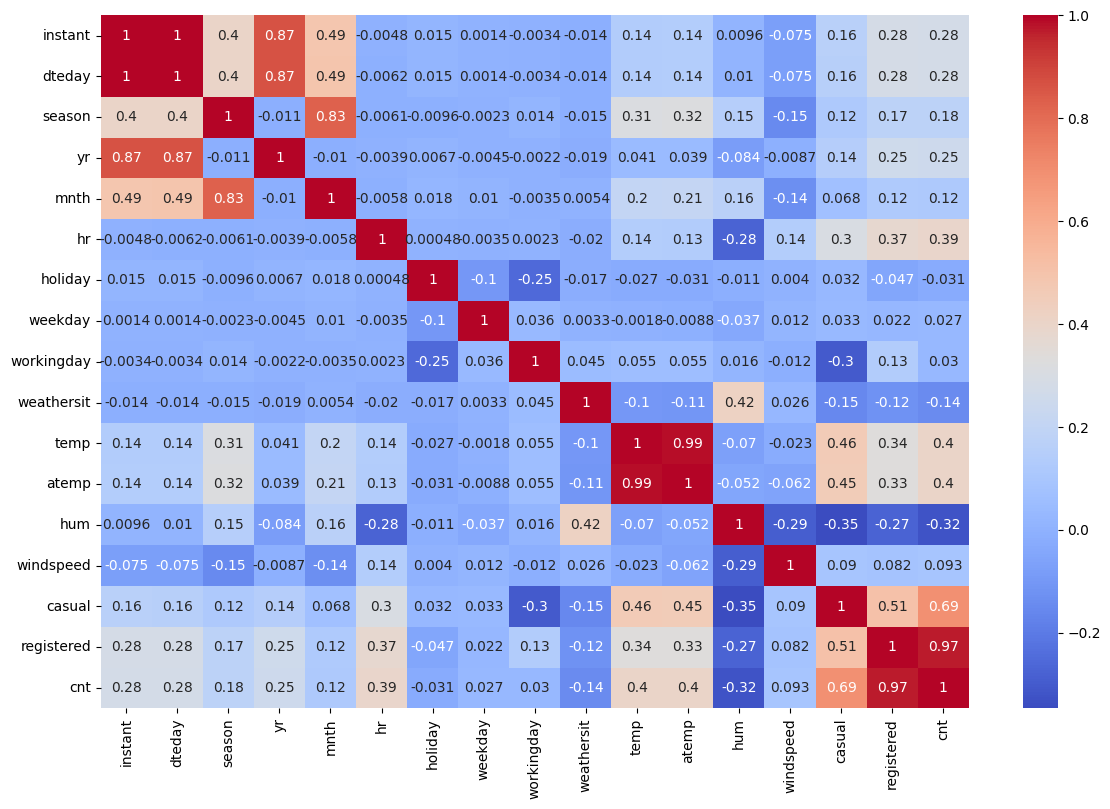

In [34]:
corr = df.corr()
plt.figure(figsize=(14,9))
sn.heatmap(corr, annot=True, cmap='coolwarm')

cnt is the target variable of this correlation matrix

From the heatmap we can infer that the casual and registered attributes have high correlation with target variable

If you have high correlation then those attributes are treated as important attributes and with the help of those attributes we can easily predict target variable

Any attribute whose range is above +0.05 or -0.05 that attribute will have some importance with the variable. Here you can see that temperature attribute has positive correlation of 0.4 

Based on hour attribute you can also predict how many vehicles will be rented by users in the particular hour

You can also infer that the attributes holiday, weekday and workingday are not much important variables as their values are below +0.05 or -0.05

To eliminate some of the features in the input variable you should check the complete data, here you can clearly see that the attributes atemp and temp has 0.99 correlation which is highly positive value. If you see correlation values more than 0.7 then you can drop any one of the feature as both the values represent a similar pattern  

You can also see that yr(year) is highly correlated with instant , instant attribute contains serial numbers which is of less importance so we can drop instant and you can also see mnth(month) is highly correlated with season so you can drop any one of them 

### 1. Pearson's Correlation Coefficient
Pearson's correlation measures the **linear relationship** between two continuous variables. Values range from -1 to 1, where:
- \(1\) indicates a perfect positive linear relationship,
- \(-1\) indicates a perfect negative linear relationship,
- \(0\) indicates no linear relationship.

It assumes that both variables are normally distributed.

In [54]:
np.random.seed(0)
data = {
    'X': np.random.normal(0, 1, 100),
    'Y': np.random.normal(0, 1, 100)
}
df = pd.DataFrame(data)
pearson_corr = df['X'].corr(df['Y'], method='pearson')
print(f"Pearson's correlation: {pearson_corr}")

Pearson's correlation: 0.1117291988189485


### 2. Spearman's Rank Correlation
Spearman's correlation measures the **monotonic relationship** between two variables, which means that as one variable increases, the other tends to either only increase or only decrease. It does not require a linear relationship and can handle ordinal (ranked) data, making it robust to outliers and suitable for non-linear relationships.



In [60]:
df = pd.DataFrame({
    'X': [1, 2, 3, 4, 5],
    'Y': [2, 4, 6, 8, 10],
    'Z': [5, 3, 4, 2, 1]
})

# Calculate the Spearman correlation matrix for all columns
spearman_corr = df.corr(method='spearman')

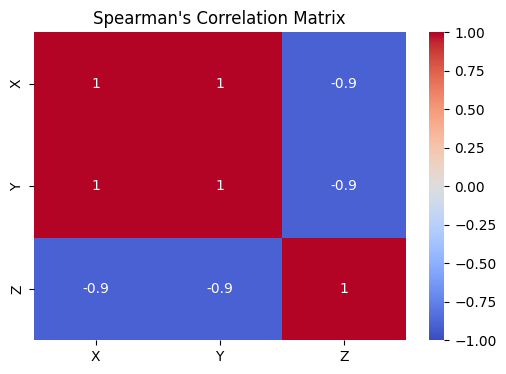

In [62]:
plt.figure(figsize=(6, 4))
sn.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman's Correlation Matrix")
plt.show()

### 3. Kendall's Tau
Kendall's Tau is another rank-based correlation method, which is particularly useful for **ordinal data**. It assesses the correlation by comparing the **order or ranks** of values in two datasets, rather than the values themselves. It is often used when the dataset is small or when handling data with a lot of tied ranks.

In [56]:
kendall_corr = df['X'].corr(df['Y'], method='kendall')
print(f"Kendall's Tau correlation: {kendall_corr}")

Kendall's Tau correlation: 0.06141414141414143


### Summary
Each method can be used based on the type of relationship you're examining:
- **Pearson's** for linear relationships.
- **Spearman's** for monotonic (not necessarily linear) relationships.
- **Kendall's Tau** for rank-based or ordinal data.

Each method call in `pandas` with `corr()` provides a straightforward way to measure these types of correlations in Python.

## Correlation Matrix Heatmap
This heatmap visually represents the strength and direction of correlations among variables in the dataset. The colors range from blue to red, where:
- Blue represents negative correlations,
- Red represents positive correlations, and
- White or neutral tones represent weak or no correlation.

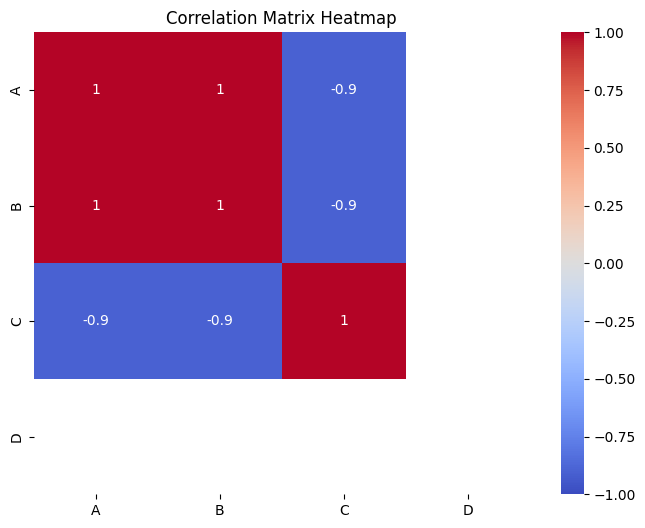

In [63]:
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [2, 4, 6, 8, 10],
    'C': [5, 3, 4, 2, 1],
    'D': [5, 5, 5, 5, 5]
})

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Correlation Spectrum
A correlation spectrum provides a visual scale or color bar next to the heatmap to indicate the range of correlation coefficients. Here’s what these ranges typically represent:

- **-1.0 to -0.7:** Strong negative correlation
- **-0.7 to -0.3:** Moderate negative correlation
- **-0.3 to 0.0:** Weak negative correlation
- **0.0 to 0.3:** Weak positive correlation
- **0.3 to 0.7:** Moderate positive correlation
- **0.7 to 1.0:** Strong positive correlation

## Table of Correlation Strengths

| Correlation Coefficient Range | Description               |
|-------------------------------|---------------------------|
| \(+1.0\)                      | Perfect positive correlation |
| \(0.7\) to \(0.99\)           | Strong positive correlation |
| \(0.3\) to \(0.69\)           | Moderate positive correlation |
| \(0.0\) to \(0.29\)           | Weak positive correlation    |
| \(0\)                         | No correlation              |
| \(-0.3\) to \(-0.69\)         | Moderate negative correlation |
| \(-0.7\) to \(-0.99\)         | Strong negative correlation |
| \(-1.0\)                      | Perfect negative correlation |

Each of these categories helps interpret the relationships between variables more accurately.